# **Data Science Intership PROJECT**
# **Client:** **No-Churn Telecom | Category: Telecom – Churn Rate ML**

# **Project Ref: PM-PR-0017 bold text**

# Business Problem
No-Churn Telecom, a European telecom operator, faces a churn rate above 10% due to intense market competition. Despite efforts like tariff reductions and promotions, customer retention remains a challenge. The company seeks to leverage Machine Learning to address this issue by:

**Identifying Key Churn Drivers**: Understanding which factors influence customers to leave.
**Churn Risk Scoring**: Creating a score to identify high-risk customers for targeted retention.
**Predictive Churn Flag**: Introducing a CHURN-FLAG (YES/NO) to help focus retention campaigns on customers likely to churn.


# Data Attributes
* Account Length, Charges, Call Mins: Customer usage patterns.

* CustServ Calls: Frequency of customer service calls, indicating dissatisfaction.

* International/VMail Plans: Service plan preferences.

* Churn: Target variable (YES/NO) indicating customer churn.

# Goal
The ML model will identify churn factors, score customers based on churn risk, and predict which customers are likely to churn, enabling No-Churn to improve retention strategies.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import Data
df = pd.read_csv('table.csv')

In [ ]:
pd.set_option('display.max_columns',None)
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
df.shape

(4617, 21)

In [ ]:
#Assigning column names
df.rename(columns={'columns1':'State',	'columns2':'Account_Length', 'columns3':'Area_Code',
            'columns4':'Phone',	'columns5':'International_Plan',	'columns6':'VMail_Plan','columns7':'VMail_Message',
            'columns8':	'Day_hours', 'columns9':'Day_Calls',	'columns10':'Day_Charge',	'columns11':'Eve_hours',
            'columns12':'Eve_Calls','columns13':'Eve_Charge','columns14':'Night_hours','columns15':'Night_Calls',
            'columns16':'Night_Charge','columns17':'International_hours','columns18':'International_calls',
            'columns19':'International_Charge','columns20':'CustServ_Calls','columns21':'Churn'},inplace=True)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_hours             4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_hours             4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_hours           4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

In [ ]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_hours,Day_Calls,Day_Charge,Eve_hours,Eve_Calls,Eve_Charge,Night_hours,Night_Calls,Night_Charge,International_hours,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
#Descriptive analysis for Qualitative Data
df.describe()

,Account_Length,Area_Code,VMail_Message,Day_hours,Day_Calls,Day_Charge,Eve_hours,Eve_Calls,Eve_Charge,Night_hours,Night_Calls,Night_Charge,International_hours,International_calls,International_Charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Descriptive analysis for Quantitative Data
df.describe(include='O')

,State,Phone,International_Plan,VMail_Plan,Churn
count,4617,4617,4617,4617,4617
unique,51,4617,2,2,2
top,WV,382-4657,no,no,False.
freq,149,1,4171,3381,3961


In [ ]:
#converting minutes to hours
df['Day_hours']=df['Day_hours']/60
df['Eve_hours']=df['Eve_hours']/60
df['Night_hours']=df['Night_hours']/60
df['International_hours']=df['International_hours']/60


In [ ]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_hours,Day_Calls,Day_Charge,Eve_hours,Eve_Calls,Eve_Charge,Night_hours,Night_Calls,Night_Charge,International_hours,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,4.418333,110,45.07,3.290000,99,16.78,4.078333,91,11.01,0.166667,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,2.693333,123,27.47,3.258333,103,16.62,4.240000,103,11.45,0.228333,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,4.056667,114,41.38,2.020000,110,10.30,2.710000,104,7.32,0.203333,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,4.990000,71,50.90,1.031667,88,5.26,3.281667,89,8.86,0.110000,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,2.778333,113,28.34,2.471667,122,12.61,3.115000,121,8.41,0.168333,3,2.73,3,False.


In [ ]:
#checking for null values
df.isnull().sum()

,0
State,0
Account_Length,0
Area_Code,0
Phone,0
International_Plan,0
VMail_Plan,0
VMail_Message,0
Day_hours,0
Day_Calls,0
Day_Charge,0


In [ ]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,Account_Length,Area_Code,VMail_Message,Day_hours,Day_Calls,Day_Charge,Eve_hours,Eve_Calls,Eve_Charge,Night_hours,Night_Calls,Night_Charge,International_hours,International_calls,International_Charge,CustServ_Calls
0,128,415,25,4.418333,110,45.07,3.290000,99,16.78,4.078333,91,11.01,0.166667,3,2.70,1
1,107,415,26,2.693333,123,27.47,3.258333,103,16.62,4.240000,103,11.45,0.228333,3,3.70,1
2,137,415,0,4.056667,114,41.38,2.020000,110,10.30,2.710000,104,7.32,0.203333,5,3.29,0
3,84,408,0,4.990000,71,50.90,1.031667,88,5.26,3.281667,89,8.86,0.110000,7,1.78,2
4,75,415,0,2.778333,113,28.34,2.471667,122,12.61,3.115000,121,8.41,0.168333,3,2.73,3


In [ ]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,State,Phone,International_Plan,VMail_Plan,Churn
0,KS,382-4657,no,yes,False.
1,OH,371-7191,no,yes,False.
2,NJ,358-1921,no,no,False.
3,OH,375-9999,yes,no,False.
4,OK,330-6626,yes,no,False.


# Uni-variate Analysis

In [ ]:
#function to plot the histogram
def plot(df):
  plt.figure(figsize=(15,15))
  plotnumber=1
  for column in df.columns:
    plt.subplot(3,6,plotnumber)
    sns.histplot(df[column],kde=True)
    plotnumber+=1
  plt.tight_layout()

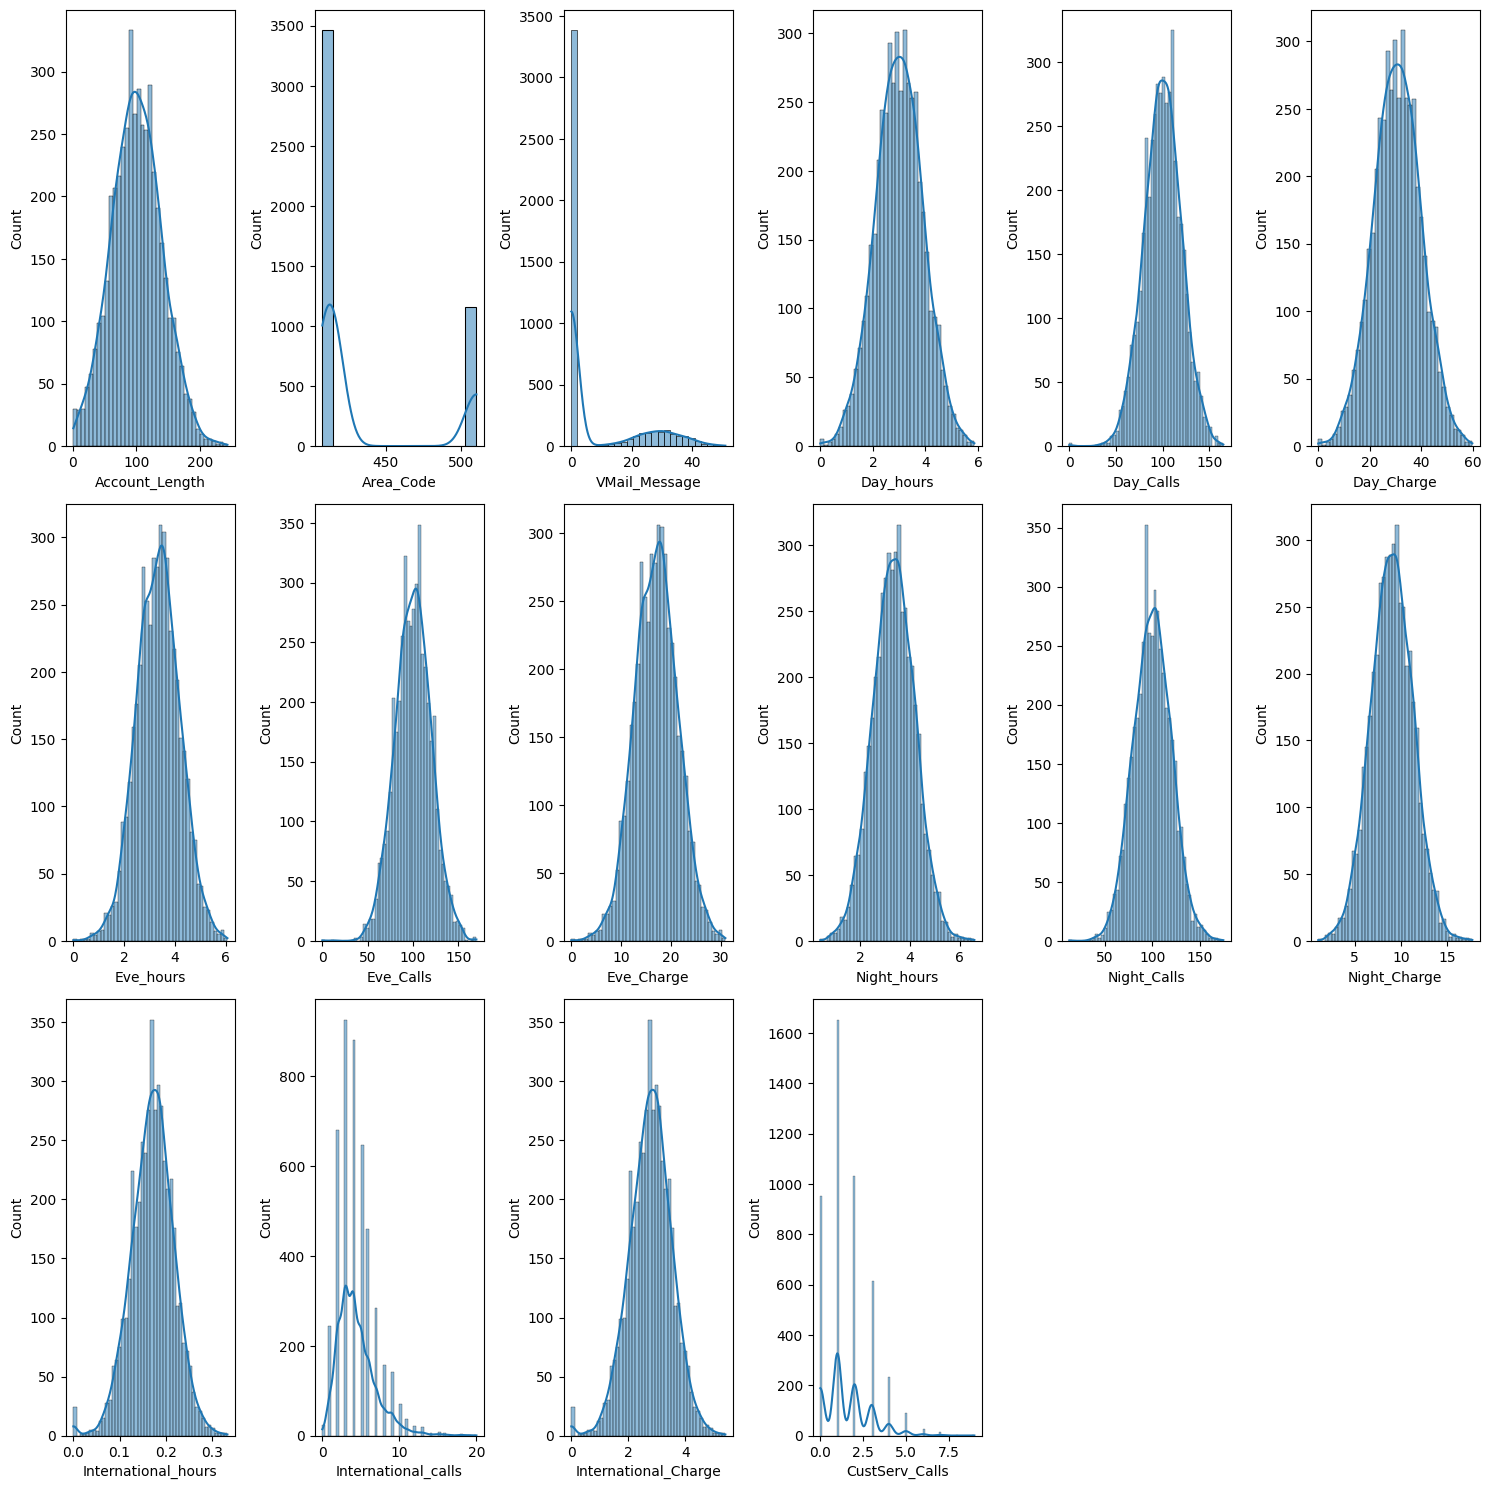

In [ ]:
plot(df_num)

* Data follows naormal distribution
* international calls are slightly skewed to left
* In Vmail message, the majority is 0.

<Axes: xlabel='count', ylabel='Churn'>

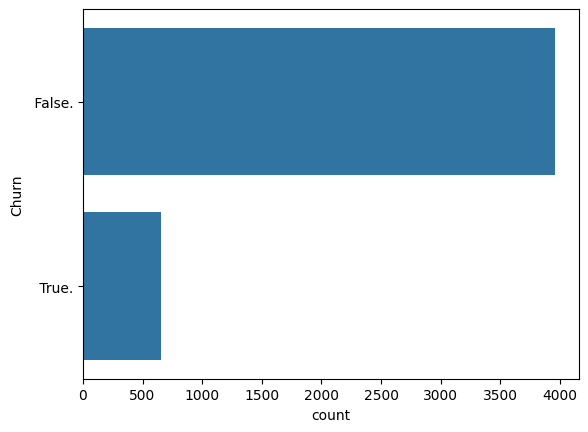

In [ ]:
sns.countplot(df['Churn'])

* Above plot shows that there is a large imbalance in the churn data.

<Axes: xlabel='count', ylabel='State'>

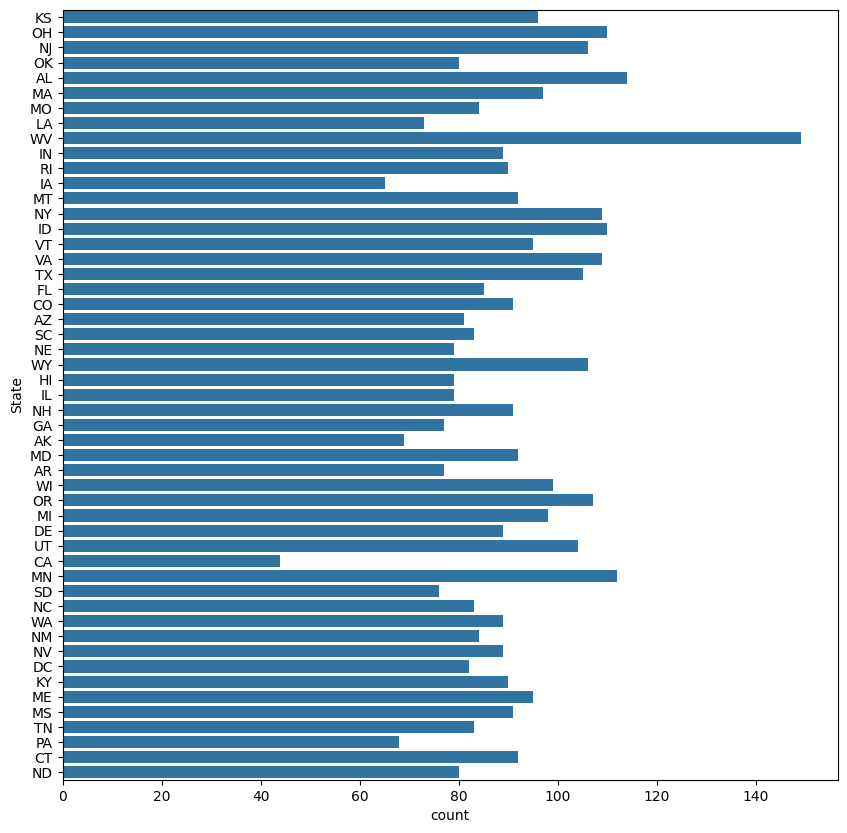

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df['State'])

* Average number of users is about 60's
* Majority of users are from WV
* Least number of users are from CA

In [ ]:
#function to plot scatterplot
def plotcc(df,column1,column2):
  plotnumber=1
  plt.figure(figsize=(10,10))

  plt.subplot(2,2,plotnumber)
  sns.scatterplot(x=df[column1],y=df[column2])
  plotnumber+=1
  plt.tight_layout()


# Bi-Variate Analysis

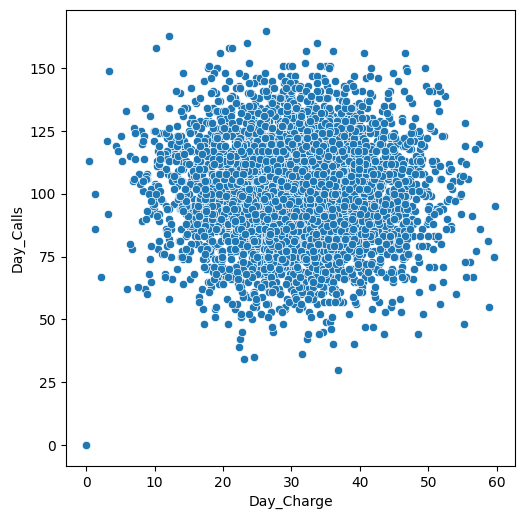

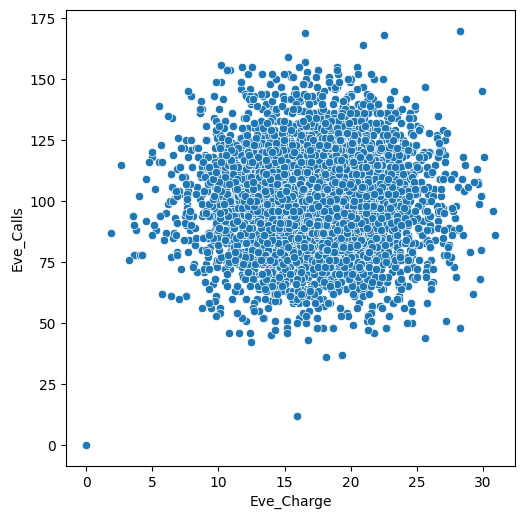

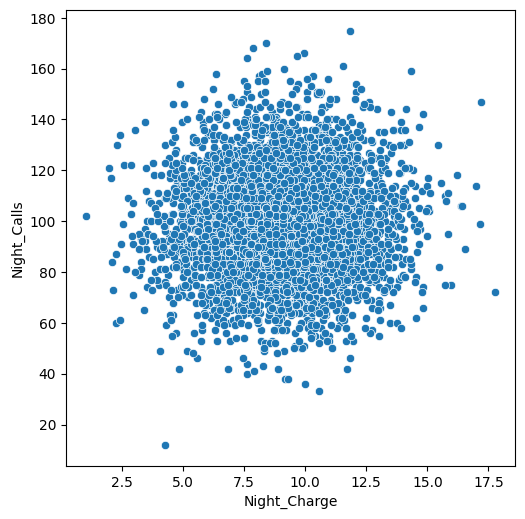

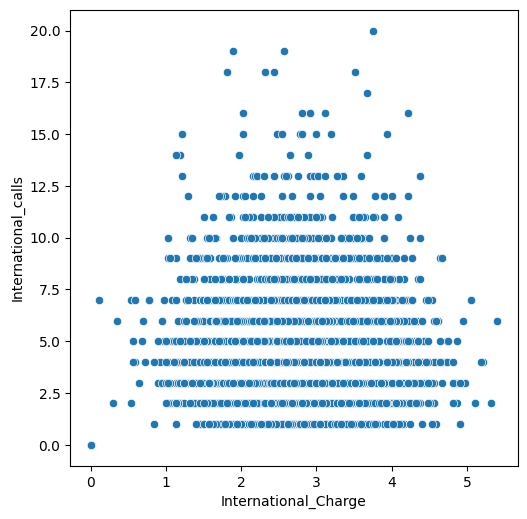

In [ ]:
plotcc(df_num,'Day_Charge','Day_Calls')
plotcc(df_num,'Eve_Charge','Eve_Calls')
plotcc(df_num,'Night_Charge','Night_Calls')
plotcc(df_num,'International_Charge','International_calls')

In [ ]:
#function to plot barplot
def plotbc(df,column1,column2):
  plotnumber=1
  plt.figure(figsize=(10,10))

  plt.subplot(1,1,plotnumber)
  sns.barplot(x=df[column1],y=df[column2])
  plotnumber+=1
  plt.tight_layout()

# State wise Charges

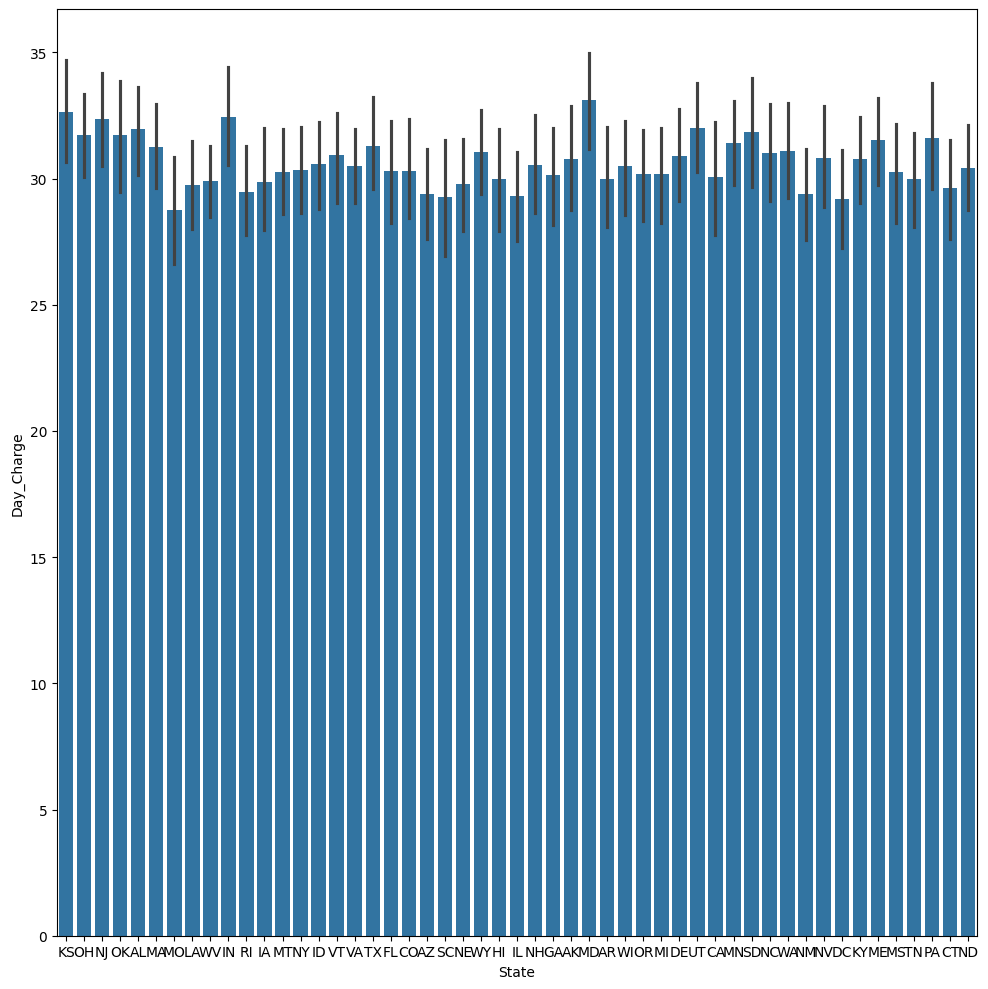

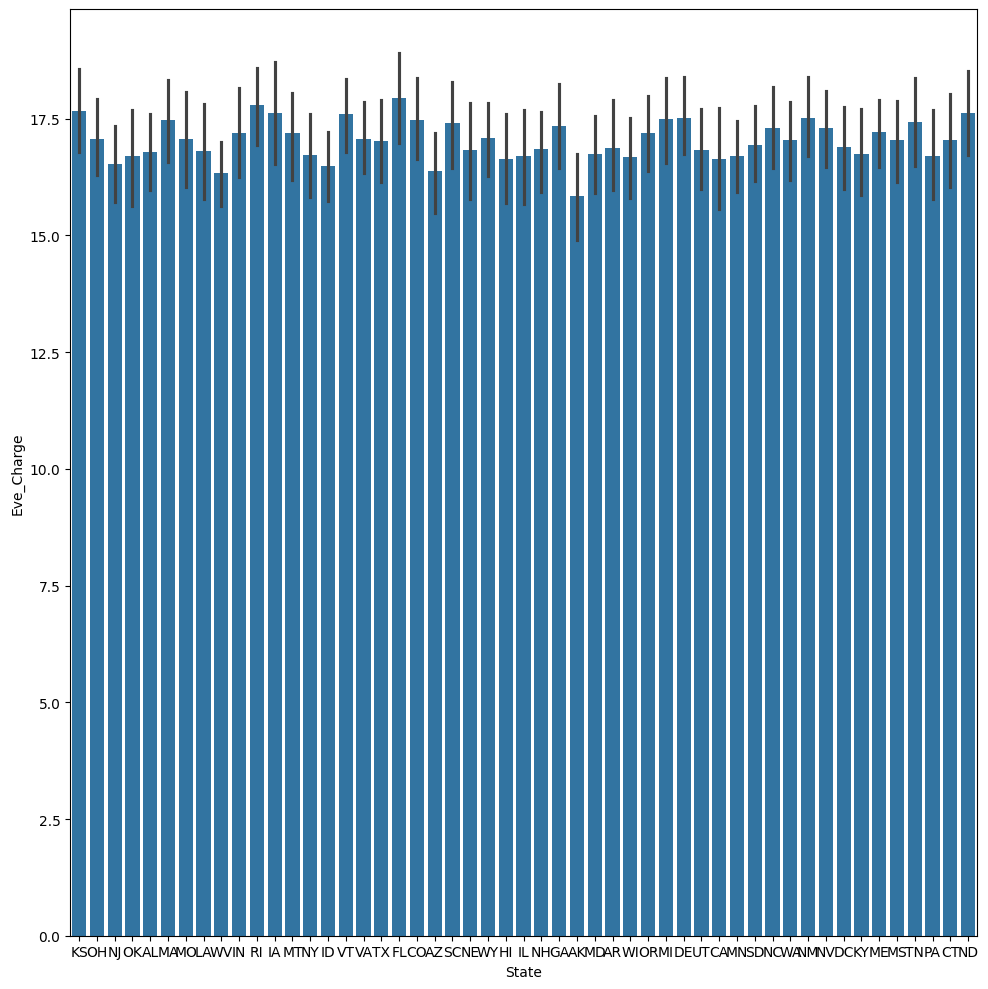

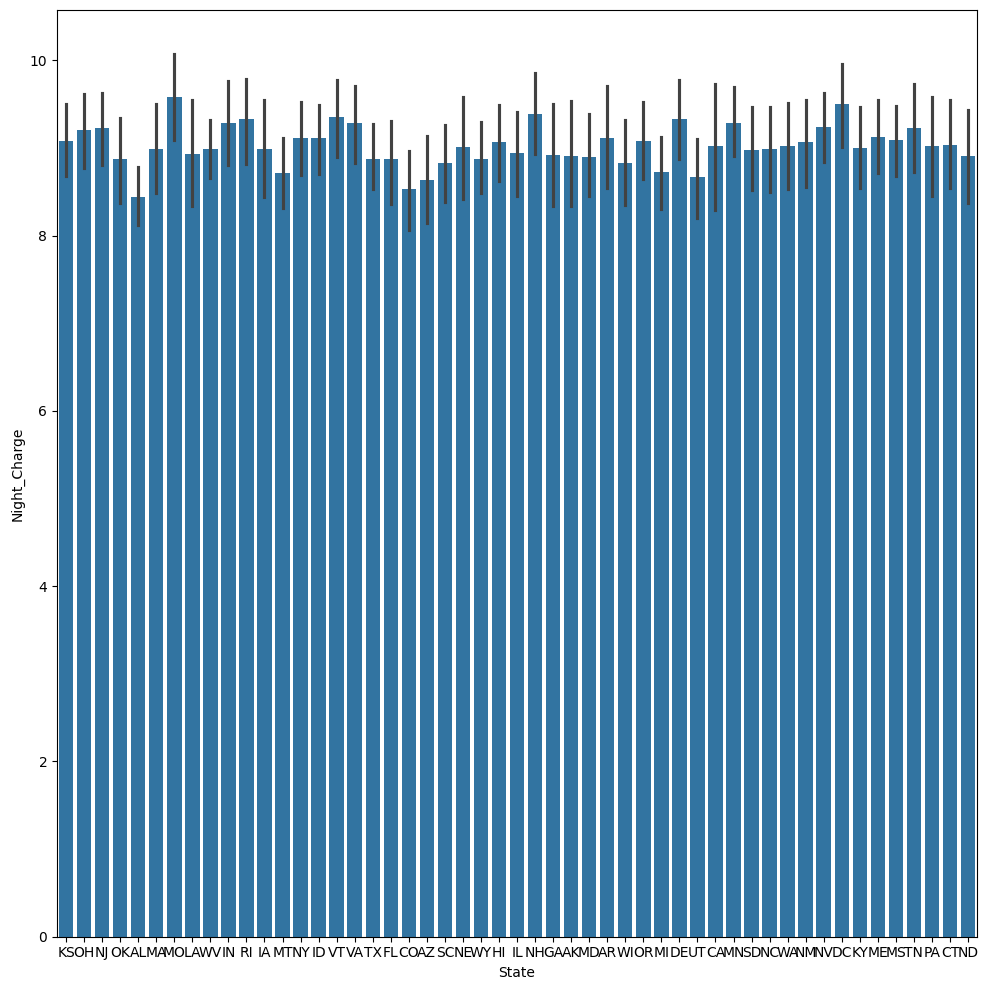

In [ ]:

plotbc(df,'State','Day_Charge')

plotbc(df,'State','Eve_Charge')
plotbc(df,'State','Night_Charge')

* Charges per state during day is above 25
* Charges per state during evening is above 15
* Charges per state during night is above 8
* We can observe that the charges during the day is triple than night.
* This could be a possible reason for high churn rate.

In [ ]:
#function to plot boxplot
def plotbox(df):
  plt.figure(figsize=(15,15))
  plotnumber=1
  for column in df.columns:
    plt.subplot(3,6,plotnumber)
    sns.boxplot(df[column])
    plotnumber+=1
  plt.tight_layout()

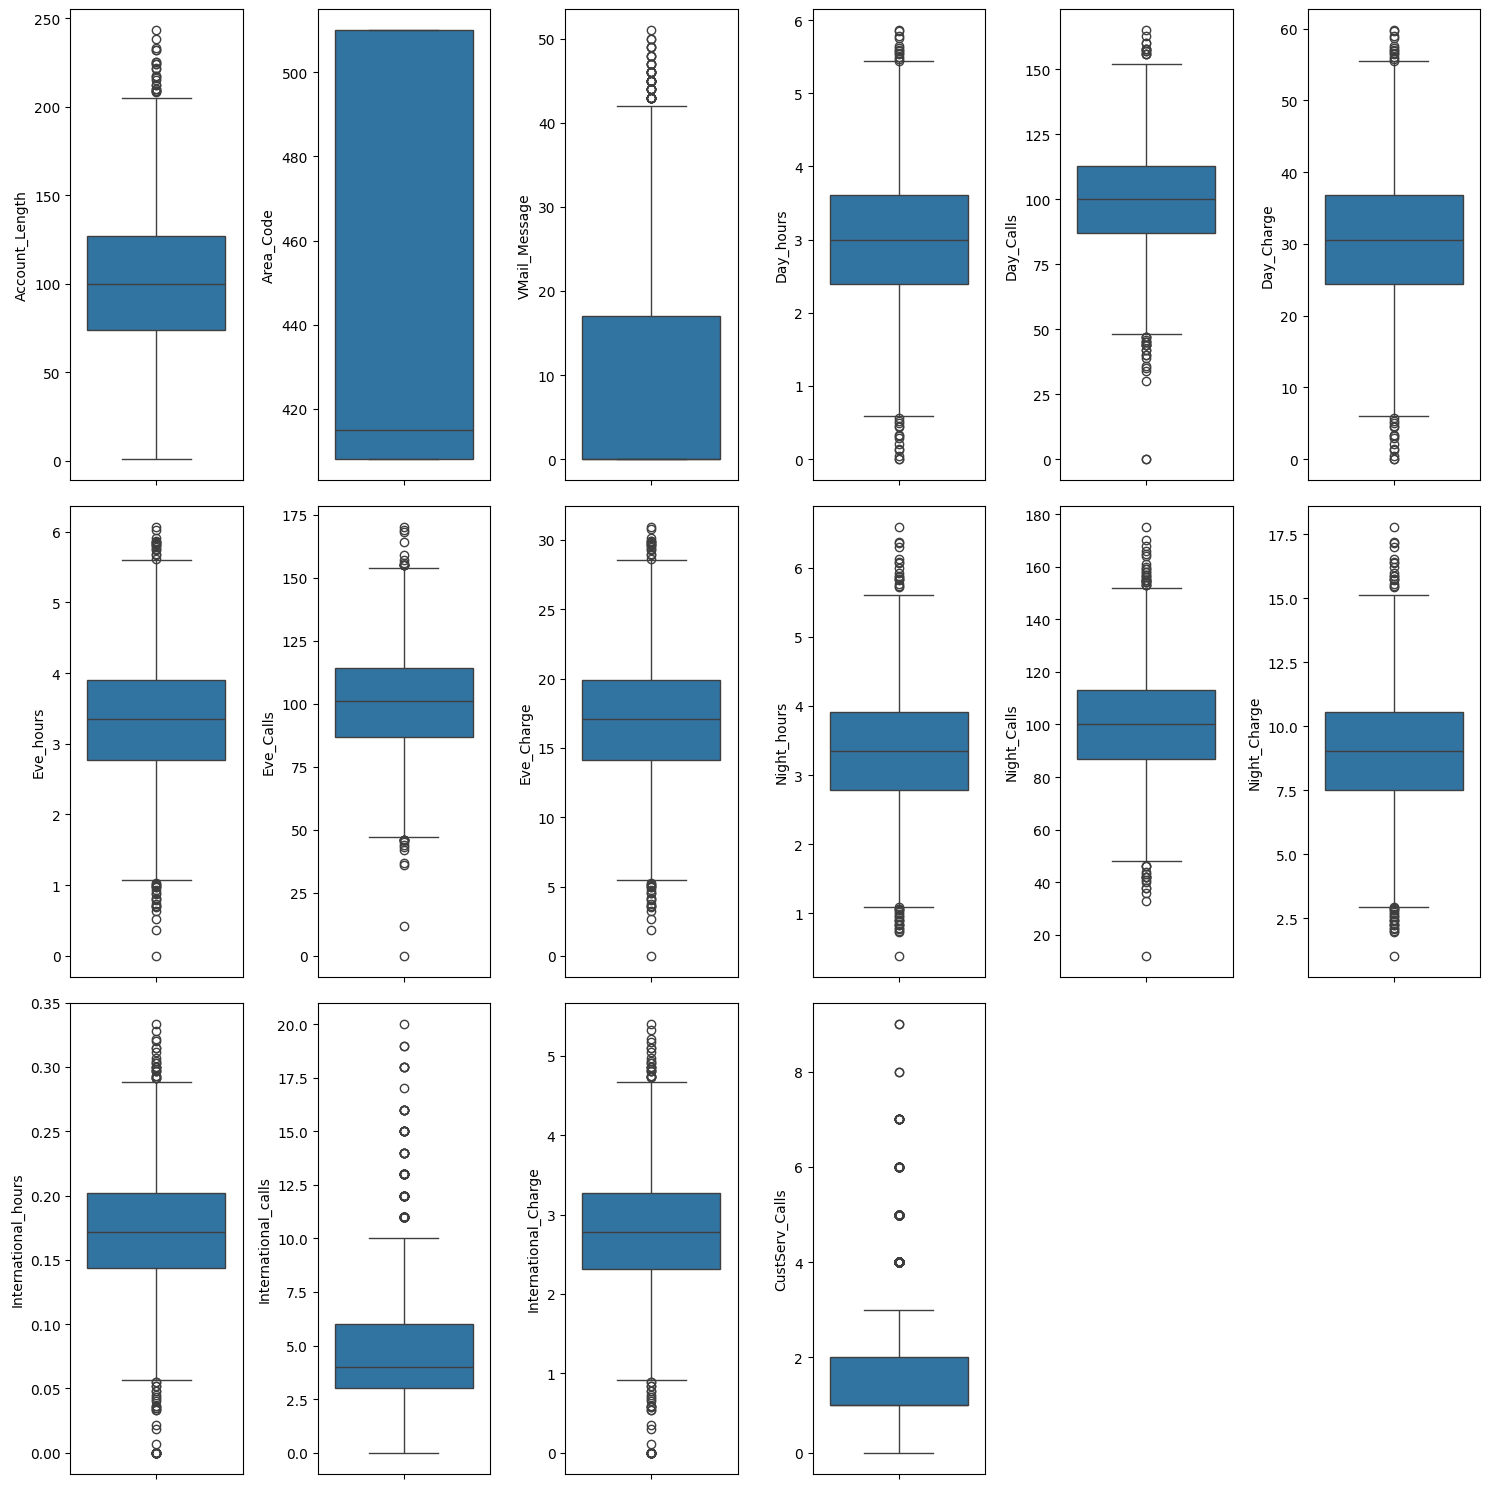

In [ ]:
#visualization of outliers
plotbox(df_num)

In [ ]:
#function to remove outliers
def outliers1(df,column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    LB = Q1 - (1.5 * IQR)
    UB = Q3 + (1.5 * IQR)

    mean_value = df[column].mean()

    df[column] = np.where((df[column] < LB) | (df[column] > UB), mean_value, df[column])

    return df

In [ ]:
for column in df_num.drop('Area_Code',axis=1).columns:
    outliers1(df_num, column)

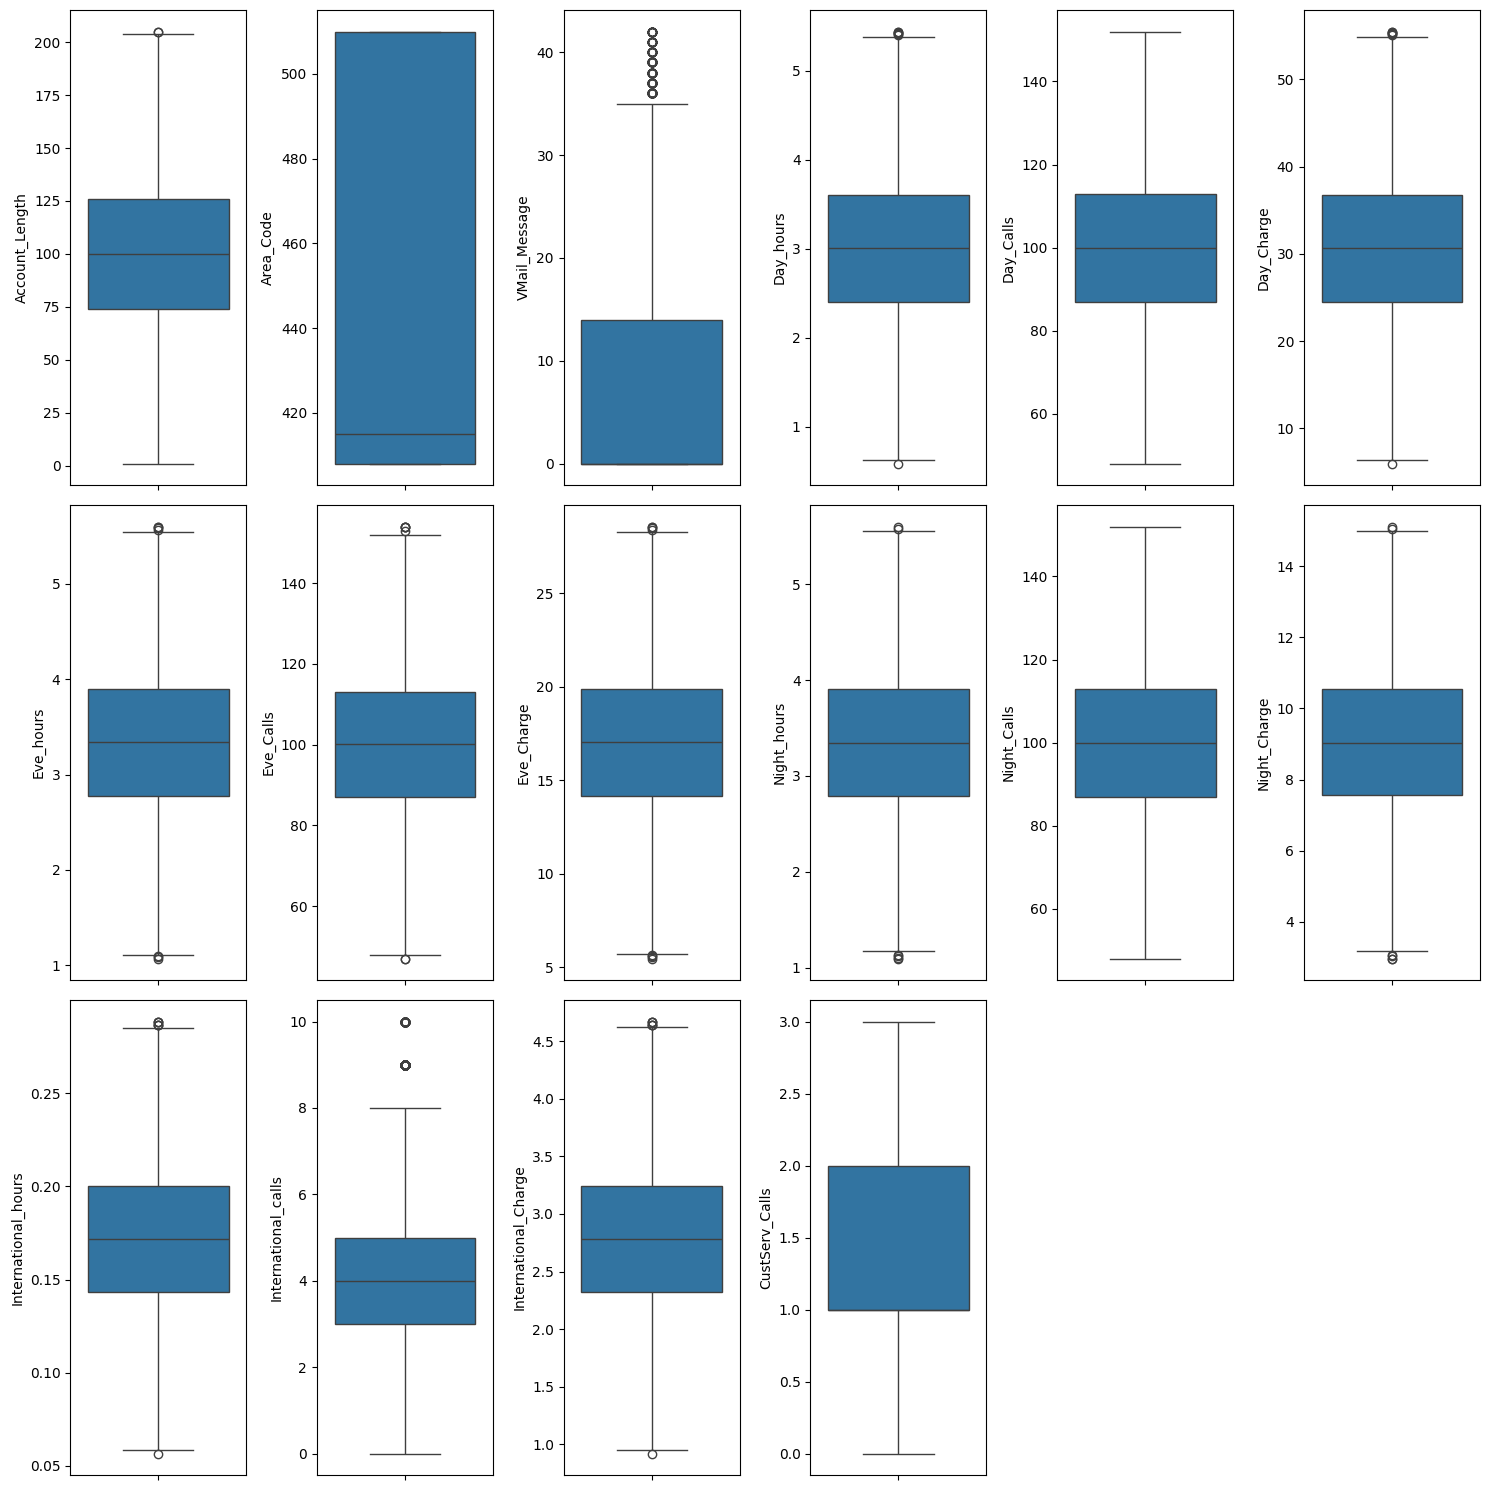

In [ ]:
plotbox(df_num)

<Axes: >

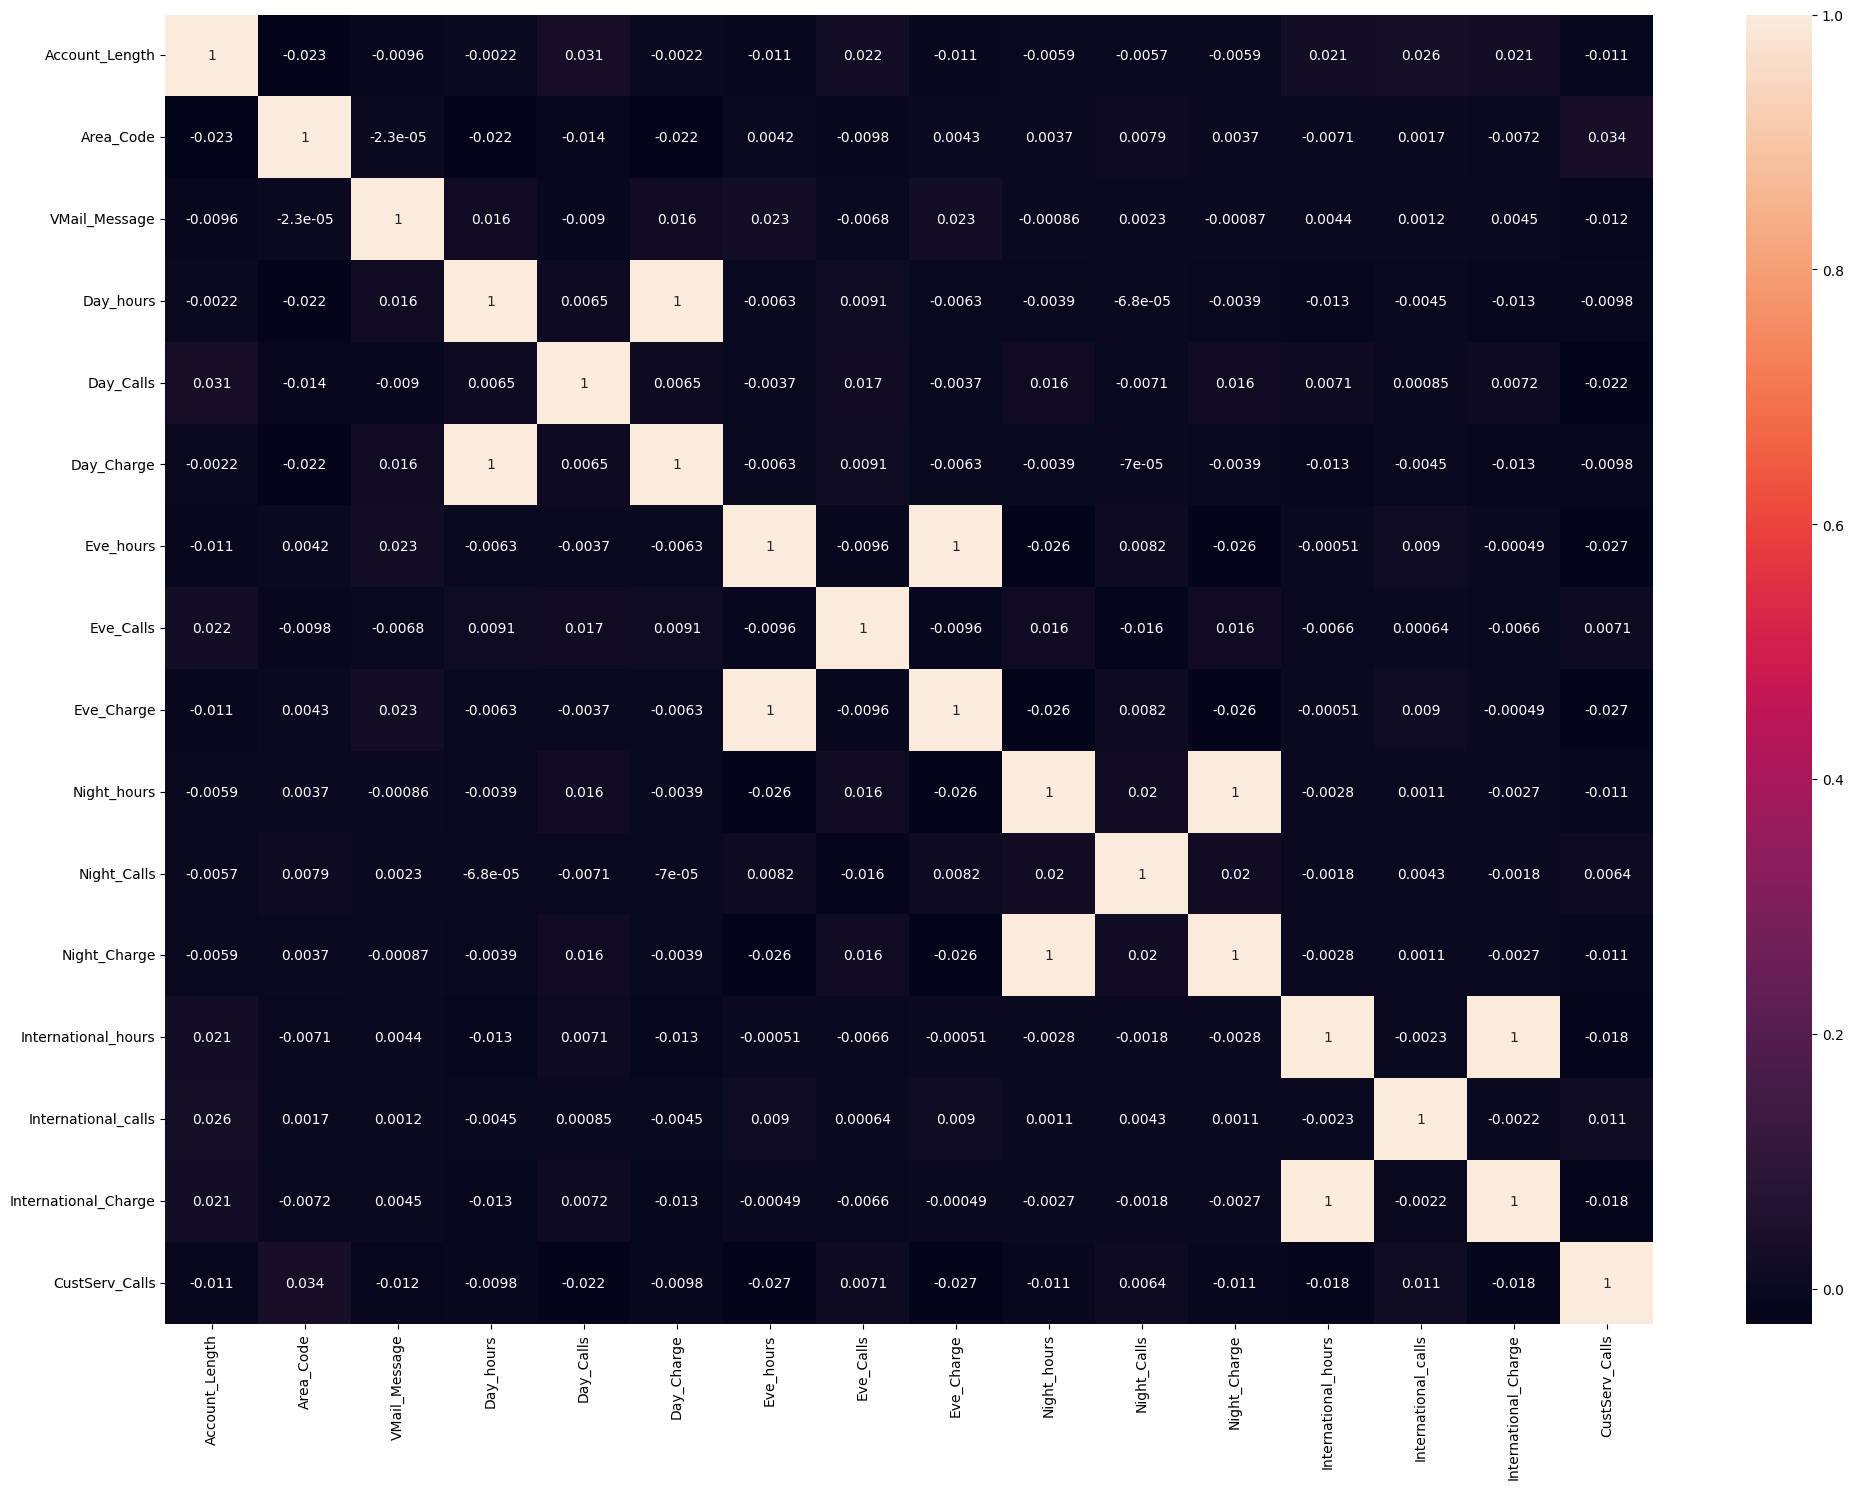

In [ ]:
plt.figure(figsize=(24,17))
sns.heatmap(df_num.corr(),annot=True)

* The above plot shows that there is a clear co-relation between the duration of call and the charges applied with respect to the duration.
* Therefore the columns like 'Day_Charge', 'Eve_Charge', 'Night_Charge', 'International_Charge' are dropped for further analysis.

# Feature Engineering

In [ ]:
#converting charges per hour
df_num['Day_Charge_per_hour'] = df['Day_Charge']/df['Day_hours']
df_num['Eve_Charge_per_hour'] = df['Eve_Charge']/df['Eve_hours']
df_num['Night_Charge_per_hour'] = df['Night_Charge']/df['Night_hours']
df_num['International_Charge_per_hour'] = df['International_Charge']/df['International_hours']


In [ ]:
df_num.drop(['Day_Charge','Eve_Charge','Night_Charge','International_Charge'],axis=1)
df_num.head()

,Account_Length,Area_Code,VMail_Message,Day_hours,Day_Calls,Day_Charge,Eve_hours,Eve_Calls,Eve_Charge,Night_hours,Night_Calls,Night_Charge,International_hours,International_calls,International_Charge,CustServ_Calls,Day_Charge_per_hour,Eve_Charge_per_hour,Night_Charge_per_hour,International_Charge_per_hour
0,128.0,415,25.0,4.418333,110.0,45.07,3.290000,99.0,16.780000,4.078333,91.0,11.01,0.166667,3.0,2.70,1.0,10.200679,5.100304,2.699632,16.200000
1,107.0,415,26.0,2.693333,123.0,27.47,3.258333,103.0,16.620000,4.240000,103.0,11.45,0.228333,3.0,3.70,1.0,10.199257,5.100767,2.700472,16.204380
2,137.0,415,0.0,4.056667,114.0,41.38,2.020000,110.0,10.300000,2.710000,104.0,7.32,0.203333,5.0,3.29,0.0,10.200493,5.099010,2.701107,16.180328
3,84.0,408,0.0,4.990000,71.0,50.90,3.340485,88.0,17.036703,3.281667,89.0,8.86,0.110000,7.0,1.78,2.0,10.200401,5.098546,2.699848,16.181818
4,75.0,415,0.0,2.778333,113.0,28.34,2.471667,122.0,12.610000,3.115000,121.0,8.41,0.168333,3.0,2.73,3.0,10.200360,5.101821,2.699839,16.217822


In [ ]:
df_num.drop(['Day_hours','Eve_hours','Night_hours','International_hours'],axis=1)
df_num.head()

,Account_Length,Area_Code,VMail_Message,Day_hours,Day_Calls,Day_Charge,Eve_hours,Eve_Calls,Eve_Charge,Night_hours,Night_Calls,Night_Charge,International_hours,International_calls,International_Charge,CustServ_Calls,Day_Charge_per_hour,Eve_Charge_per_hour,Night_Charge_per_hour,International_Charge_per_hour
0,128.0,415,25.0,4.418333,110.0,45.07,3.290000,99.0,16.780000,4.078333,91.0,11.01,0.166667,3.0,2.70,1.0,10.200679,5.100304,2.699632,16.200000
1,107.0,415,26.0,2.693333,123.0,27.47,3.258333,103.0,16.620000,4.240000,103.0,11.45,0.228333,3.0,3.70,1.0,10.199257,5.100767,2.700472,16.204380
2,137.0,415,0.0,4.056667,114.0,41.38,2.020000,110.0,10.300000,2.710000,104.0,7.32,0.203333,5.0,3.29,0.0,10.200493,5.099010,2.701107,16.180328
3,84.0,408,0.0,4.990000,71.0,50.90,3.340485,88.0,17.036703,3.281667,89.0,8.86,0.110000,7.0,1.78,2.0,10.200401,5.098546,2.699848,16.181818
4,75.0,415,0.0,2.778333,113.0,28.34,2.471667,122.0,12.610000,3.115000,121.0,8.41,0.168333,3.0,2.73,3.0,10.200360,5.101821,2.699839,16.217822


In [ ]:
#calculating total calls per day and total charges per day
df['Calls_per_Day'] = df_num['Day_Calls']+df_num['Eve_Calls']+df_num['Night_Calls']
df['Charge_per_Day'] = df_num['Day_Charge_per_hour']+df_num['Eve_Charge_per_hour']+df_num['Night_Charge_per_hour']

In [ ]:
#calculating per hour charges
df['International_Charge_hour'] = df['International_Charge']/df['International_hours']


In [ ]:
df_num.head()

,Account_Length,Area_Code,VMail_Message,Day_hours,Day_Calls,Day_Charge,Eve_hours,Eve_Calls,Eve_Charge,Night_hours,Night_Calls,Night_Charge,International_hours,International_calls,International_Charge,CustServ_Calls,Day_Charge_per_hour,Eve_Charge_per_hour,Night_Charge_per_hour,International_Charge_per_hour
0,128.0,415,25.0,4.418333,110.0,45.07,3.290000,99.0,16.780000,4.078333,91.0,11.01,0.166667,3.0,2.70,1.0,10.200679,5.100304,2.699632,16.200000
1,107.0,415,26.0,2.693333,123.0,27.47,3.258333,103.0,16.620000,4.240000,103.0,11.45,0.228333,3.0,3.70,1.0,10.199257,5.100767,2.700472,16.204380
2,137.0,415,0.0,4.056667,114.0,41.38,2.020000,110.0,10.300000,2.710000,104.0,7.32,0.203333,5.0,3.29,0.0,10.200493,5.099010,2.701107,16.180328
3,84.0,408,0.0,4.990000,71.0,50.90,3.340485,88.0,17.036703,3.281667,89.0,8.86,0.110000,7.0,1.78,2.0,10.200401,5.098546,2.699848,16.181818
4,75.0,415,0.0,2.778333,113.0,28.34,2.471667,122.0,12.610000,3.115000,121.0,8.41,0.168333,3.0,2.73,3.0,10.200360,5.101821,2.699839,16.217822


In [ ]:
df_num['Area_Code'].value_counts()

,count
Area_Code,
415,2299
408,1161
510,1157


In [ ]:
df.groupby('Area_Code')['Churn'].value_counts()

Area_Code  Churn  
408         False.     996
            True.      165
415         False.    1981
            True.      318
510         False.     984
            True.      173
Name: count, dtype: int64

* Churn rate per Area code.

In [ ]:
df_num['CustServ_Calls'].value_counts()

,count
CustServ_Calls,
1.000000,1651
2.000000,1031
0.000000,951
3.000000,616
1.567035,368


In [ ]:
df.groupby('CustServ_Calls')['Churn'].value_counts()

CustServ_Calls  Churn  
0                False.     835
                 True.      116
1                False.    1475
                 True.      176
2                False.     919
                 True.      112
3                False.     551
                 True.       65
4                False.     130
                 True.      104
5                True.       55
                 False.      34
6                True.       18
                 False.      10
7                True.        7
                 False.       6
8                False.       1
                 True.        1
9                True.        2
Name: count, dtype: int64

In [ ]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_hours,Day_Calls,Day_Charge,Eve_hours,Eve_Calls,Eve_Charge,Night_hours,Night_Calls,Night_Charge,International_hours,International_calls,International_Charge,CustServ_Calls,Churn,Calls_per_Day,Charge_per_Day,International_Charge_hour
0,KS,128,415,382-4657,no,yes,25,4.418333,110,45.07,3.290000,99,16.78,4.078333,91,11.01,0.166667,3,2.70,1,False.,300.0,18.000615,16.200000
1,OH,107,415,371-7191,no,yes,26,2.693333,123,27.47,3.258333,103,16.62,4.240000,103,11.45,0.228333,3,3.70,1,False.,329.0,18.000496,16.204380
2,NJ,137,415,358-1921,no,no,0,4.056667,114,41.38,2.020000,110,10.30,2.710000,104,7.32,0.203333,5,3.29,0,False.,328.0,18.000610,16.180328
3,OH,84,408,375-9999,yes,no,0,4.990000,71,50.90,1.031667,88,5.26,3.281667,89,8.86,0.110000,7,1.78,2,False.,248.0,17.998794,16.181818
4,OK,75,415,330-6626,yes,no,0,2.778333,113,28.34,2.471667,122,12.61,3.115000,121,8.41,0.168333,3,2.73,3,False.,356.0,18.002020,16.217822


In [ ]:
df1 = df.drop(['Phone','Day_hours','Eve_hours','Night_hours','International_hours','International_Charge','Day_Calls','Eve_Calls','Night_Calls'],axis=1)

In [ ]:
df1.head()

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Charge,Eve_Charge,Night_Charge,International_calls,CustServ_Calls,Churn,Calls_per_Day,Charge_per_Day,International_Charge_hour
0,KS,128,415,no,yes,25,45.07,16.78,11.01,3,1,False.,300.0,18.000615,16.200000
1,OH,107,415,no,yes,26,27.47,16.62,11.45,3,1,False.,329.0,18.000496,16.204380
2,NJ,137,415,no,no,0,41.38,10.30,7.32,5,0,False.,328.0,18.000610,16.180328
3,OH,84,408,yes,no,0,50.90,5.26,8.86,7,2,False.,248.0,17.998794,16.181818
4,OK,75,415,yes,no,0,28.34,12.61,8.41,3,3,False.,356.0,18.002020,16.217822


In [ ]:
df['State'].value_counts()

,count
State,
WV,149
AL,114
MN,112
OH,110
ID,110
VA,109
NY,109
OR,107
NJ,106


In [ ]:
pd.set_option('display.max_rows',None)
df.groupby('State')['Churn'].value_counts()

State  Churn  
AK      False.     64
        True.       5
AL      False.    104
        True.      10
AR      False.     62
        True.      15
AZ      False.     74
        True.       7
CA      False.     31
        True.      13
CO      False.     81
        True.      10
CT      False.     78
        True.      14
DC      False.     73
        True.       9
DE      False.     75
        True.      14
FL      False.     73
        True.      12
GA      False.     67
        True.      10
HI      False.     74
        True.       5
IA      False.     59
        True.       6
ID      False.     97
        True.      13
IL      False.     72
        True.       7
IN      False.     76
        True.      13
KS      False.     78
        True.      18
KY      False.     77
        True.      13
LA      False.     66
        True.       7
MA      False.     83
        True.      14
MD      False.     72
        True.      20
ME      False.     77
        True.      18
MI      False.     81
        True.      17
MN      False.     94
        True.      18
MO      False.     73
        True.      11
MS      False.     75
        True.      16
MT      False.     73
        True.      19
NC      False.     71
        True.      12
ND      False.     73
        True.       7
NE      False.     73
        True.       6
NH      False.     80
        True.      11
NJ      False.     81
        True.      25
NM      False.     76
        True.       8
NV      False.     72
        True.      17
NY      False.     91
        True.      18
OH      False.     95
        True.      15
OK      False.     65
        True.      15
OR      False.     90
        True.      17
PA      False.     60
        True.       8
RI      False.     83
        True.       7
SC      False.     67
        True.      16
SD      False.     64
        True.      12
TN      False.     71
        True.      12
TX      False.     81
        True.      24
UT      False.     88
        True.      16
VA      False.    103
        True.       6
VT      False.     85
        True.      10
WA      False.     68
        True.      21
WI      False.     91
        True.       8
WV      False.    128
        True.      21
WY      False.     96
        True.      10
Name: count, dtype: int64

* Due to imbalance in the target variable categories, every area has has high amount of false count comparatively.

In [ ]:
df1_num = df1.select_dtypes(include=np.number)
df1_num.head()

,Account_Length,Area_Code,VMail_Message,Day_Charge,Eve_Charge,Night_Charge,International_calls,CustServ_Calls,Calls_per_Day,Charge_per_Day,International_Charge_hour
0,128,415,25,45.07,16.78,11.01,3,1,300.0,18.000615,16.200000
1,107,415,26,27.47,16.62,11.45,3,1,329.0,18.000496,16.204380
2,137,415,0,41.38,10.30,7.32,5,0,328.0,18.000610,16.180328
3,84,408,0,50.90,5.26,8.86,7,2,248.0,17.998794,16.181818
4,75,415,0,28.34,12.61,8.41,3,3,356.0,18.002020,16.217822


In [ ]:
df1_cat = df1.select_dtypes(include='object')
df1_cat.head()

,State,International_Plan,VMail_Plan,Churn
0,KS,no,yes,False.
1,OH,no,yes,False.
2,NJ,no,no,False.
3,OH,yes,no,False.
4,OK,yes,no,False.


<Axes: >

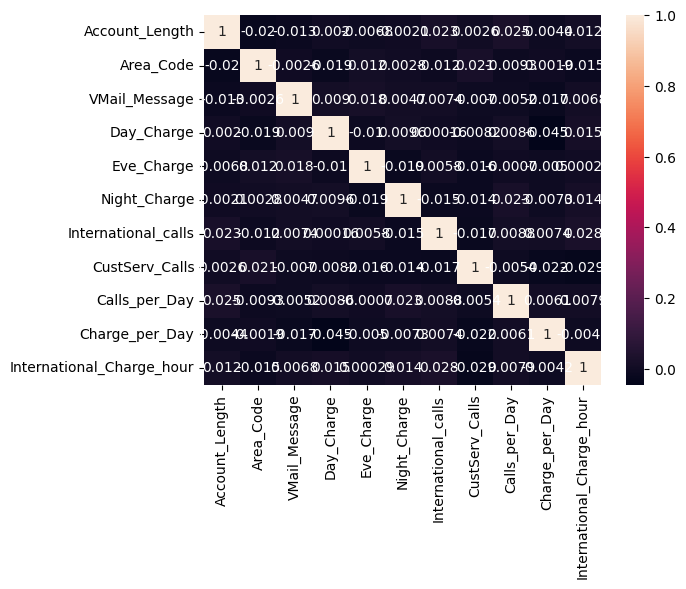

In [ ]:
sns.heatmap(df1_num.corr(),annot=True)

* The 'Phone' column is dropped because each individual has different phone number, therefore it has zero co-relation with the target variable.

# Function for encoder

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df1_cat['State'] = pd.DataFrame(le.fit_transform(df1_cat['State']),columns=['State'])
df1_cat['International_Plan']=pd.DataFrame(le.fit_transform(df1_cat['International_Plan']),columns=['International_Plan'])
df1_cat['VMail_Plan']=pd.DataFrame(le.fit_transform(df1_cat['VMail_Plan']),columns=['VMail_Plan'])
df1_cat['Churn_flag']=pd.DataFrame(le.fit_transform(df1_cat['Churn']),columns=['Churn'])
State = pd.get_dummies(df1_cat['State'],dtype=int)

df1_cat.drop('State',axis=1,inplace=True)


In [ ]:
df1_cat.head()

,International_Plan,VMail_Plan,Churn,Churn_flag
0,0,1,False.,0
1,0,1,False.,0
2,0,0,False.,0
3,1,0,False.,0
4,1,0,False.,0


In [ ]:
AreaCode = pd.get_dummies(df1['Area_Code'], prefix='Area_Code',dtype=int)
AreaCode.head()

,Area_Code_408,Area_Code_415,Area_Code_510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [ ]:
df1_cat.drop('Churn',axis=1,inplace=True)
df1_cat.head()

,International_Plan,VMail_Plan,Churn_flag
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0


In [ ]:
df1_cat['Churn_flag'].value_counts()

,count
Churn_flag,
0,3961
1,656


In [ ]:
df1_num.drop('Area_Code',axis=1,inplace=True)
df1_num.head()

,Account_Length,VMail_Message,Day_Charge,Eve_Charge,Night_Charge,International_calls,CustServ_Calls,Calls_per_Day,Charge_per_Day,International_Charge_hour
0,128,25,45.07,16.78,11.01,3,1,300.0,18.000615,16.200000
1,107,26,27.47,16.62,11.45,3,1,329.0,18.000496,16.204380
2,137,0,41.38,10.30,7.32,5,0,328.0,18.000610,16.180328
3,84,0,50.90,5.26,8.86,7,2,248.0,17.998794,16.181818
4,75,0,28.34,12.61,8.41,3,3,356.0,18.002020,16.217822


In [ ]:
#checking if theres any infinity values.
inf_check = np.isinf(df1_num).any()
large_check = (df1_num > np.finfo(np.float64).max).any()
if inf_check.any() or large_check.any(): # Use .any() to check if any value in the Series is True
  df1_num.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df1_num.fillna(df1_num.mean(),inplace=True)

In [ ]:
df1_num.isnull().sum()

,0
Account_Length,0
VMail_Message,0
Day_Charge,0
Eve_Charge,0
Night_Charge,0
International_calls,0
CustServ_Calls,0
Calls_per_Day,0
Charge_per_Day,0
International_Charge_hour,0


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1_num_scaled = pd.DataFrame(ss.fit_transform(df1_num),columns=df1_num.columns)
df1_num_scaled.head()

,Account_Length,VMail_Message,Day_Charge,Eve_Charge,Night_Charge,International_calls,CustServ_Calls,Calls_per_Day,Charge_per_Day,International_Charge_hour
0,0.690901,1.261885,1.568569,-0.059742,0.871418,-0.583487,-0.433885,-0.006655,0.144039,-0.175424
1,0.160503,1.335463,-0.349447,-0.096978,1.064889,-0.583487,-0.433885,0.867789,0.086699,0.045070
2,0.918214,-0.577587,1.166439,-1.567818,-0.751101,0.230398,-1.199068,0.837636,0.141520,-1.165839
3,-0.420409,-0.577587,2.203911,-2.740765,-0.073952,1.044284,0.331298,-1.574624,-0.735038,-1.090807
4,-0.647723,-0.577587,-0.254636,-1.030217,-0.271820,-0.583487,1.096480,1.681927,0.822374,0.721833


In [ ]:
#Concatinating all the dataframes
final_df = pd.concat([df1_cat,df1_num,AreaCode,State],axis=1)
final_df.head()

,International_Plan,VMail_Plan,Churn_flag,Account_Length,VMail_Message,Day_Charge,Eve_Charge,Night_Charge,International_calls,CustServ_Calls,Calls_per_Day,Charge_per_Day,International_Charge_hour,Area_Code_408,Area_Code_415,Area_Code_510,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,1,0,128,25,45.07,16.78,11.01,3,1,300.0,18.000615,16.200000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,107,26,27.47,16.62,11.45,3,1,329.0,18.000496,16.204380,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,137,0,41.38,10.30,7.32,5,0,328.0,18.000610,16.180328,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,84,0,50.90,5.26,8.86,7,2,248.0,17.998794,16.181818,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,75,0,28.34,12.61,8.41,3,3,356.0,18.002020,16.217822,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=final_df.drop('Churn_flag',axis=1)
y=final_df['Churn_flag']

# **Model Creation**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_train.value_counts()

,count
Churn_flag,
0,3162
1,531


In [ ]:
#Since churn flag is imbalanced, we are resampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_sm,y_sm = smote.fit_resample(x_train,y_train)

In [ ]:
y_sm.value_counts()

,count
Churn_flag,
1,3162
0,3162


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#function to train the model display its accuracy
def model(model,x,y):
  model.fit(x,y)
  y_pred = model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))


In [ ]:
model(LogisticRegression(),x_sm,y_sm)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       799
           1       0.31      0.49      0.38       125

    accuracy                           0.79       924
   macro avg       0.61      0.66      0.63       924
weighted avg       0.83      0.79      0.81       924

[[666 133]
 [ 64  61]]


In [ ]:
model(DecisionTreeClassifier(),x_sm,y_sm)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       799
           1       0.45      0.71      0.55       125

    accuracy                           0.84       924
   macro avg       0.70      0.79      0.73       924
weighted avg       0.88      0.84      0.86       924

[[689 110]
 [ 36  89]]


In [ ]:
model(RandomForestClassifier(),x_sm,y_sm)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       799
           1       0.75      0.62      0.68       125

    accuracy                           0.92       924
   macro avg       0.85      0.80      0.82       924
weighted avg       0.92      0.92      0.92       924

[[773  26]
 [ 47  78]]


ROC-AUC Score: 0.8779924906132667


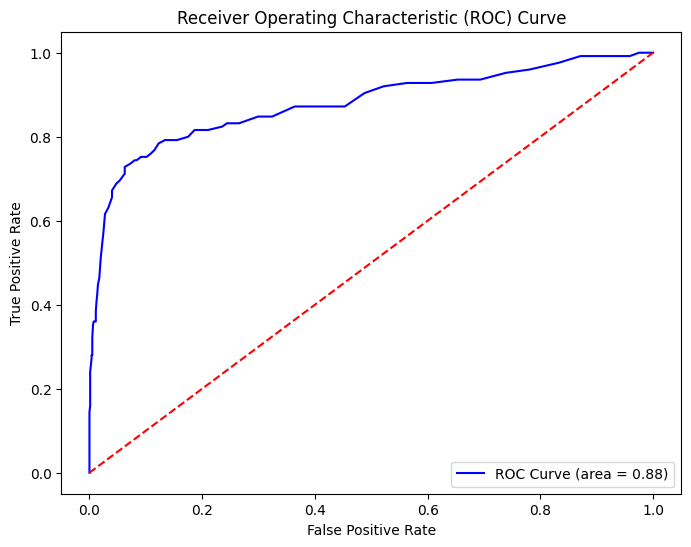

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
lr = RandomForestClassifier()
lr.fit(x_sm, y_sm)
y_prob = lr.predict_proba(x_test)[:, 1]


roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

* there is 89 percent of true positive rate.

In [ ]:
model(KNeighborsClassifier(3),x_sm,y_sm)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       799
           1       0.18      0.34      0.24       125

    accuracy                           0.70       924
   macro avg       0.53      0.55      0.53       924
weighted avg       0.79      0.70      0.74       924

[[606 193]
 [ 82  43]]


In [ ]:
model(SVC(),x_sm,y_sm)

              precision    recall  f1-score   support

           0       0.89      0.65      0.75       799
           1       0.18      0.50      0.27       125

    accuracy                           0.63       924
   macro avg       0.54      0.58      0.51       924
weighted avg       0.80      0.63      0.69       924

[[519 280]
 [ 62  63]]


# Hyper-Parameter Tuning

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Specifying the algorithm and its parameters
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(n_jobs=-1),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10, 100, 200],
            'randomforestclassifier__criterion': ['gini', 'entropy'],
            'randomforestclassifier__min_samples_split': [2, 3]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(multi_class='auto', n_jobs=-1),
        'params': {
            'logisticregression__C': [1, 5, 10, 50, 100],
            'logisticregression__solver': ['lbfgs', 'sag', 'newton-cg', 'liblinear'],
            'logisticregression__max_iter': [100, 200, 300]
        }
    },
    'gbm': {
        'model': GradientBoostingClassifier(loss='log_loss'),
        'params': {
            'gradientboostingclassifier__n_estimators': [1, 5, 10, 100, 200],
            'gradientboostingclassifier__max_depth': [3, 4],
            'gradientboostingclassifier__max_features': ['auto', 'log2']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'kneighborsclassifier__n_neighbors': [3, 5, 7],
            'kneighborsclassifier__weights': ['uniform', 'distance'],
            'kneighborsclassifier__metric': ['minkowski', 'euclidean', 'manhattan']
        }
    },

}


In [ ]:
#Function to select the best parameters
scores=[]
best_estimators={}
for algo,mp in model_params.items():
    pipe=make_pipeline(mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=3,return_train_score=False,verbose=3)
    clf.fit(x_sm,y_sm)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
        })
    best_estimators[algo]=clf.best_estimator_

scores

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END randomforestclassifier__criterion=gini, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1;, score=0.733 total time=   0.0s
[CV 2/3] END randomforestclassifier__criterion=gini, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1;, score=0.798 total time=   0.0s
[CV 3/3] END randomforestclassifier__criterion=gini, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=1;, score=0.804 total time=   0.0s
[CV 1/3] END randomforestclassifier__criterion=gini, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=5;, score=0.839 total time=   0.1s
[CV 2/3] END randomforestclassifier__criterion=gini, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=5;, score=0.899 total time=   0.1s
[CV 3/3] END randomforestclassifier__criterion=gini, randomforestclassifier__min_samples_

[{'model': 'random_forest',
  'best_score': 0.9271030993042378,
  'best_params': {'randomforestclassifier__criterion': 'gini',
   'randomforestclassifier__min_samples_split': 2,
   'randomforestclassifier__n_estimators': 200}},
 {'model': 'logistic_regression',
  'best_score': 0.8932637571157495,
  'best_params': {'logisticregression__C': 50,
   'logisticregression__max_iter': 100,
   'logisticregression__solver': 'newton-cg'}},
 {'model': 'gbm',
  'best_score': 0.8768184693232132,
  'best_params': {'gradientboostingclassifier__max_depth': 4,
   'gradientboostingclassifier__max_features': 'log2',
   'gradientboostingclassifier__n_estimators': 200}},
 {'model': 'knn',
  'best_score': 0.8401328273244782,
  'best_params': {'kneighborsclassifier__metric': 'minkowski',
   'kneighborsclassifier__n_neighbors': 3,
   'kneighborsclassifier__weights': 'distance'}}]

In [ ]:
scores=pd.DataFrame(scores,columns=['model','best_score','best_params'])
scores

,model,best_score,best_params
0,random_forest,0.927103,"{'randomforestclassifier__criterion': 'gini', ..."
1,logistic_regression,0.893264,"{'logisticregression__C': 50, 'logisticregress..."
2,gbm,0.876818,"{'gradientboostingclassifier__max_depth': 4, '..."
3,knn,0.840133,"{'kneighborsclassifier__metric': 'minkowski', ..."


* we can observe that all the models are giving excellent accuracy.
* However, Random Forest is the best accuracy out of all.

In [ ]:
knn=best_estimators['knn'].predict(x_test)
accuracy_score(y_test,knn)

0.7012987012987013

In [ ]:
ran=best_estimators['random_forest'].predict(x_test)
accuracy_score(y_test,ran)

0.9242424242424242

In [ ]:
log=best_estimators['logistic_regression'].predict(x_test)
accuracy_score(y_test,log)

0.8593073593073594

In [ ]:
gb=best_estimators['gbm'].predict(x_test)
accuracy_score(y_test,gb)

0.8874458874458875

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb_r=XGBClassifier()
xgb_r.fit(x_sm,y_sm)
y_predict_xgb=xgb_r.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict_xgb)

0.9264069264069265

# **Model Comparision**
* By using grid cv and fitting best parameters using hyper-parameter tuning for different models, we got the best score of,
KNN: 70.12%,
Random Forest: 92.42%,
Logistic Regression: 85.93%,
Greadient Bosting: 88.74,
XG Boost: 92.64%.
* Therefore from the above models **Random Forest** and **XG Boost** perform well with the higest accuracy score of **92.42%** and **92.64%**.




# **Summary**

### **Data Overview:**

The dataset contains information such as account length, service plans (International/VMail), call minutes, customer service calls (as an indicator of dissatisfaction), and churn (the target variable).
Features like daily, evening, night, and international call durations and charges were present, along with demographic features like state and area code.

### **Data Preprocessing:**

**Feature Engineering:**
Call minutes were converted to hours.
New features such as total daily calls and charges per hour were created.

**Handling Outliers:**
Outliers were detected and replaced with mean values using IQR.

**Imbalanced Data:**
The dataset was imbalanced, with more non-churn cases than churn cases.
SMOTE (Synthetic Minority Oversampling Technique) was used to balance the target variable.

###**Exploratory Data Analysis:**

Univariate and bivariate analyses were conducted using histograms, scatter plots, and heatmaps.

**Key Findings:**
International calls were slightly skewed.
High charges during the day compared to the evening and night might indicate a potential reason for churn.
Customer service call frequency strongly correlates with churn.
Certain states showed higher churn rates.

**Modeling and Evaluation:** Several machine learning models were tested, and their performance was evaluated using accuracy, confusion matrix, and ROC-AUC scores.

### **Models Used:**

Logistic Regression
Decision Tree
Random Forest
K-Nearest Neighbors (KNN)
Support Vector Classifier (SVC)
XGBoost
Model Performance:

Random Forest: 92.42% accuracy
XGBoost: 92.64% accuracy
Logistic Regression: 85.93% accuracy
Gradient Boosting: 88.74% accuracy
KNN: 70.12% accuracy
The **Random Forest** and **XGBoost** models performed the best, achieving accuracies of **92.42%** and **92.64%**, respectively. Hyper-parameter tuning using GridSearchCV helped optimize these models for maximum accuracy.

**Conclusion:** This churn prediction model provides No-Churn Telecom with actionable insights by identifying key churn drivers and providing churn risk scores for each customer. The high accuracy of the Random Forest and XGBoost models will allow the company to focus its retention strategies on customers with the highest likelihood of churning, ultimately improving customer retention and reducing churn rates.